## 형태소 분석이 필요한 한국어.
- 한국어는 교착어의 특성이 강해 동일한 어근도 조사, 어미 등에 따라 다양한 표현으로 나타난다.
	- 조사는 1,000여 종, 어미는 5,600 여종이 발견되었다.
		- 이를 모두 별개의 단어로 고려하면 너무 방대하고 희소한 데이터가 된다.

- 형태소 분석을 통해 
	- 정보량이 적은 접사를 제외할 수 있고,
	- 어근을 기본형만 남겨둘 수도 있다.
		- 비정형 데이터를 정형데이터와 유사한 단위 형태로 만들어 처리할 수 있다.
(언어의 의미적 기본 단위 ; 형태소)

## rhinoMorph

In [1]:
import rhinoMorph
rm = rhinoMorph.startRhino()

filepath:  C:\Users\Caelu\anaconda3\envs\tf_gpu\Lib\site-packages
classpath:  C:\Users\Caelu\anaconda3\envs\tf_gpu\Lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


In [4]:
text = '임의의 한글 텍스트에 대한 테스트 분석을 수행합니다. 한글로 된 문자의 형태소를 분석하는 것은 제법 즐겁습니다.'

In [5]:
sample_data = rhinoMorph.onlyMorph_list(rm,text)
print(sample_data)

['임의', '의', '한글', '텍스트', '에', '대하', 'ㄴ', '테스트', '분석', '을', '수행', '하', 'ㅂ니다', '.', '한글', '로', '되', 'ㄴ', '문자', '의', '형태소', '를', '분석', '하', '는', '것', '은', '제법', '즐겁', '습니다', '.']


In [6]:
morphs, poses = rhinoMorph.wholeResult_list(rm,text)

print(morphs)
print(poses)


['임의', '의', '한글', '텍스트', '에', '대하', 'ㄴ', '테스트', '분석', '을', '수행', '하', 'ㅂ니다', '.', '한글', '로', '되', 'ㄴ', '문자', '의', '형태소', '를', '분석', '하', '는', '것', '은', '제법', '즐겁', '습니다', '.']
['NNG', 'JKG', 'NNG', 'NNG', 'JKB', 'VV', 'ETM', 'NNG', 'NNG', 'JKO', 'XR', 'XSV', 'EF', 'SF', 'NNG', 'JKB', 'VV', 'ETM', 'NNP', 'JKG', 'NNG', 'JKO', 'XR', 'XSV', 'ETM', 'NNB', 'JX', 'MAG', 'VA', 'EF', 'SF']


In [7]:
text_analyzed = rhinoMorph.wholeResult_text(rm,text)
print(text_analyzed)

임의의	임의/NNG + 의/JKG
한글	한글/NNG
텍스트에	텍스트/NNG + 에/JKB
대한	대하/VV + ㄴ/ETM
테스트	테스트/NNG
분석을	분석/NNG + 을/JKO
수행합니다	수행/XR + 하/XSV + ㅂ니다/EF
.	./SF
한글로	한글/NNG + 로/JKB
된	되/VV + ㄴ/ETM
문자의	문자/NNP + 의/JKG
형태소를	형태소/NNG + 를/JKO
분석하는	분석/XR + 하/XSV + 는/ETM
것은	것/NNB + 은/JX
제법	제법/MAG
즐겁습니다	즐겁/VA + 습니다/EF
.	./SF



In [9]:
text_analyzed = rhinoMorph.onlyMorph_list(rm, text, pos=['NNG', 'NNP', 'VV', 'VA',
'XR', 'IC', 'MM', 'MAG', 'MAJ'], combineN=True)
print('\n6. 형태소 분석 결과:\n', text_analyzed)
morphs, poses = rhinoMorph.wholeResult_list(rm, text, combineN=True)
print('\n7. 형태소 분석 결과: ')
print('morphs: ', morphs)
print('poses: ', poses)


6. 형태소 분석 결과:
 ['임의', '한글', '텍스트', '대하', '테스트', '분석', '수행', '한글', '되', '문자', '형태소', '분석', '제법', '즐겁']

7. 형태소 분석 결과: 
morphs:  ['임의', '의', '한글', '텍스트', '에', '대하', 'ㄴ', '테스트', '분석', '을', '수행', '하', 'ㅂ니다', '.', '한글', '로', '되', 'ㄴ', '문자', '의', '형태소', '를', '분석', '하', '는', '것', '은', '제법', '즐겁', '습니다', '.']
poses:  ['NNG', 'JKG', 'NNG', 'NNG', 'JKB', 'VV', 'ETM', 'NNG', 'NNG', 'JKO', 'XR', 'XSV', 'EF', 'SF', 'NNG', 'JKB', 'VV', 'ETM', 'NNG', 'JKG', 'NNG', 'JKO', 'XR', 'XSV', 'ETM', 'NNB', 'JX', 'MAG', 'VA', 'EF', 'SF']


- 사용 6, 7 : 한 어절에서 연결된 명사를 하나의 명사로 결합하기
- onlyMorph_list와 wholeResult_list에서 사용 가능하다

In [11]:
text_analyzed = rhinoMorph.wholeResult_list(rm, '사랑합니다')
print('\n8. 형태소 분석 결과: ', text_analyzed)
text_analyzed = rhinoMorph.wholeResult_list(rm, '사랑합니다', xrVv=True)
print('\n9. 형태소 분석 결과: ', text_analyzed)


8. 형태소 분석 결과:  (['사랑', '하', 'ㅂ니다'], ['XR', 'XSV', 'EF'])

9. 형태소 분석 결과:  (['사랑하', 'ㅂ니다'], ['VV', 'EF'])


- 사용 8, 9 : 어근 + 하 형태를 하나의 동사로 출력하기
- xrVv 아규먼트가 담당하며, 기본값은 False로서 둘을 분리하여 출력한다
- onlyMorph_list, wholeResult_list, wholeResult_text 등 모든 함수에서 사용 가능하다

## KoNLPy

- rhinoMorph와 konlpy 모두 JPype를 사용하기 때문에 동시에 사용할 수 없다.

In [1]:
text = "형태소분석기로 빅데이터 처리를 하는 것은 즐겁다"
from konlpy.tag import Hannanum
han = Hannanum()
print("한나눔 전체:", han.morphs(text))
print("한나눔 명사:", han.nouns(text))
print("한나눔 품사:", han.pos(text))
print("한나눔 태그셋:", han.tagset)
print("**********")
from konlpy.tag import Kkma
kkma = Kkma()
print("꼬꼬마 전체:", kkma.morphs(text))
print("꼬꼬마 명사:", kkma.nouns(text))
print("꼬꼬마 품사:", kkma.pos(text))
print("꼬꼬마 태그셋:", kkma.tagset)
print("*********")
from konlpy.tag import Komoran
komo = Komoran()
print("코모란 전체:", komo.morphs(text))
print("코모란 명사:", komo.nouns(text))
print("코모란 품사:", komo.pos(text))
print("코모란 태그셋:", komo.tagset)
print("*********")
from konlpy.tag import Okt
okt = Okt()
print("Okt 전체:", okt.morphs(text))
print("Okt 전체, 어말어미유지:", okt.morphs(text, stem=True))
print("Okt 명사:", okt.nouns(text))
print("Okt 품사:", okt.pos(text))
print("Okt 태그셋:", okt.tagset)

한나눔 전체: ['형태소분석기', '로', '빅데이터', '처리', '를', '하', '는', '것', '은', '즐겁', '다']
한나눔 명사: ['형태소분석기', '빅데이터', '처리', '것']
한나눔 품사: [('형태소분석기', 'N'), ('로', 'J'), ('빅데이터', 'N'), ('처리', 'N'), ('를', 'J'), ('하', 'P'), ('는', 'E'), ('것', 'N'), ('은', 'J'), ('즐겁', 'P'), ('다', 'E')]
한나눔 태그셋: {'E': '어미', 'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ET': '전성 어미', 'F': '외국어', 'I': '독립언', 'II': '감탄사', 'J': '관계언', 'JC': '격조사', 'JP': '서술격 조사', 'JX': '보조사', 'M': '수식언', 'MA': '부사', 'MM': '관형사', 'N': '체언', 'NB': '의존명사', 'NC': '보통명사', 'NN': '수사', 'NP': '대명사', 'NQ': '고유명사', 'P': '용언', 'PA': '형용사', 'PV': '동사', 'PX': '보조 용언', 'S': '기호', 'X': '접사', 'XP': '접두사', 'XS': '접미사'}
**********
꼬꼬마 전체: ['형태소', '분석기', '로', '빅', '데이터', '처리', '를', '하', '는', '것', '은', '즐겁', '다']
꼬꼬마 명사: ['형태소', '형태소분석기', '분석기', '빅', '빅데이터', '데이터', '처리']
꼬꼬마 품사: [('형태소', 'NNG'), ('분석기', 'NNG'), ('로', 'JKM'), ('빅', 'NNG'), ('데이터', 'NNG'), ('처리', 'NNG'), ('를', 'JKO'), ('하', 'VV'), ('는', 'ETD'), ('것', 'NNB'), ('은', 'JX'), ('즐겁', 'VA'), ('다', 'EFN')]
꼬꼬마

# 영어 형태소 분석

## stanza
- Stanford 대학교의 NLP 그룹에서 개발. 다국어를 지원한다.

In [2]:
import stanza
stanza.download('en')

c:\Users\Caelu\anaconda3\envs\tf_gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-09-03 14:53:11 INFO: Downloaded file to C:\Users\Caelu\stanza_resources\resources.json
2024-09-03 14:53:11 INFO: Downloading default packages for language: en (English) ...
2024-09-03 14:54:06 INFO: Downloaded file to C:\Users\Caelu\stanza_resources\en\default.zip
2024-09-03 14:54:08 INFO: Finished downloading models and saved to C:\Users\Caelu\stanza_resources


In [3]:
nlp = stanza.Pipeline(lang='en')

2024-09-03 14:54:19 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-09-03 14:54:19 INFO: Downloaded file to C:\Users\Caelu\stanza_resources\resources.json
2024-09-03 14:54:20 INFO: Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

2024-09-03 14:54:20 INFO: Using device: cpu
2024-09-03 14:54:20 INFO: Loading: tokenize
c:\Users\Caelu\anaconda3\envs\tf_gpu\lib\site-packages\stanza\models\tokenizatio

In [4]:
sentence = "This film is visually stunning and emotionally captivating. The complex characters and unpredictable plot twists immerse the audience completely into the world of the movie."

In [5]:
doc = nlp(sentence)

In [6]:
for sentence in doc.sentences:
    for word in sentence.words:
        print(f'Word : {word.text}, Lemma : {word.lemma}, POS : {word.pos}')

Word : This, Lemma : this, POS : DET
Word : film, Lemma : film, POS : NOUN
Word : is, Lemma : be, POS : AUX
Word : visually, Lemma : visually, POS : ADV
Word : stunning, Lemma : stunning, POS : ADJ
Word : and, Lemma : and, POS : CCONJ
Word : emotionally, Lemma : emotionally, POS : ADV
Word : captivating, Lemma : captivating, POS : ADJ
Word : ., Lemma : ., POS : PUNCT
Word : The, Lemma : the, POS : DET
Word : complex, Lemma : complex, POS : ADJ
Word : characters, Lemma : character, POS : NOUN
Word : and, Lemma : and, POS : CCONJ
Word : unpredictable, Lemma : unpredictable, POS : ADJ
Word : plot, Lemma : plot, POS : NOUN
Word : twists, Lemma : twist, POS : NOUN
Word : immerse, Lemma : immerse, POS : VERB
Word : the, Lemma : the, POS : DET
Word : audience, Lemma : audience, POS : NOUN
Word : completely, Lemma : completely, POS : ADV
Word : into, Lemma : into, POS : ADP
Word : the, Lemma : the, POS : DET
Word : world, Lemma : world, POS : NOUN
Word : of, Lemma : of, POS : ADP
Word : the, L

- lemma : 기본형, pos : 품사

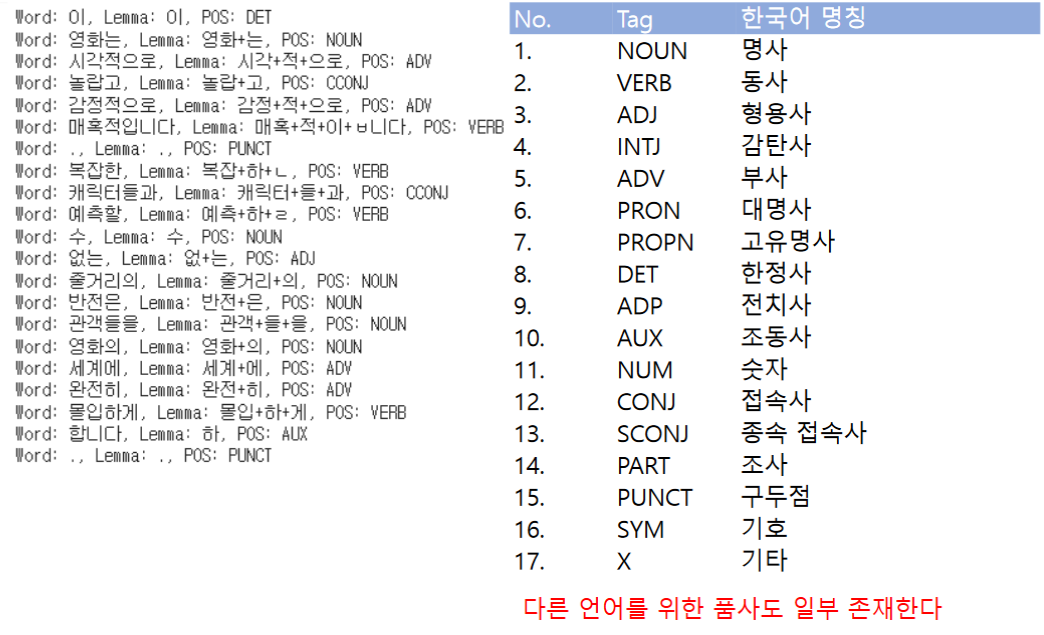

## NLTK, Natural Language Toolkit

4, 5년 전만 해도 많이 썼으나 이제 잘 안쓴다.

In [5]:
import nltk
nltk.download('punkt_tab') # 형태소 분석 모델 다운로드

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Caelu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [3]:
sentence = "This film is visually stunning and emotionally captivating. The complex characters and unpredictable plot twists immerse the audience completely into the world of the movie."

In [6]:
from nltk import tokenize
word_tokens = tokenize.word_tokenize(sentence) # 형태소 분석
sent_tokens = tokenize.sent_tokenize(sentence) # 문장 부호 기준 문장 분리

print(word_tokens)
print(sent_tokens)

['This', 'film', 'is', 'visually', 'stunning', 'and', 'emotionally', 'captivating', '.', 'The', 'complex', 'characters', 'and', 'unpredictable', 'plot', 'twists', 'immerse', 'the', 'audience', 'completely', 'into', 'the', 'world', 'of', 'the', 'movie', '.']
['This film is visually stunning and emotionally captivating.', 'The complex characters and unpredictable plot twists immerse the audience completely into the world of the movie.']


- 품사 태깅을 하려면 아래의 모델을 추가로 다운로드해야 한다

In [9]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Caelu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [10]:
from nltk import tag, tokenize
word_tokens = tokenize.word_tokenize(sentence) # 형태소 분석
pos = tag.pos_tag(word_tokens)
print(pos)

[('This', 'DT'), ('film', 'NN'), ('is', 'VBZ'), ('visually', 'RB'), ('stunning', 'JJ'), ('and', 'CC'), ('emotionally', 'RB'), ('captivating', 'VBG'), ('.', '.'), ('The', 'DT'), ('complex', 'JJ'), ('characters', 'NNS'), ('and', 'CC'), ('unpredictable', 'JJ'), ('plot', 'NN'), ('twists', 'NNS'), ('immerse', 'VBP'), ('the', 'DT'), ('audience', 'NN'), ('completely', 'RB'), ('into', 'IN'), ('the', 'DT'), ('world', 'NN'), ('of', 'IN'), ('the', 'DT'), ('movie', 'NN'), ('.', '.')]


### NLTK 기본형 분석
- 기본형 분석은 WordNet을 이용한다.
- 각 단어와 품사 정보를 넣는 방식으로 동작한다.

In [11]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Caelu\AppData\Roaming\nltk_data...


True

In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
word = 'drove'
lemma = lemmatizer.lemmatize(word, pos='v') # 분석 대상의 pos 앞 글자를 지정한다.
print(lemma)

drive


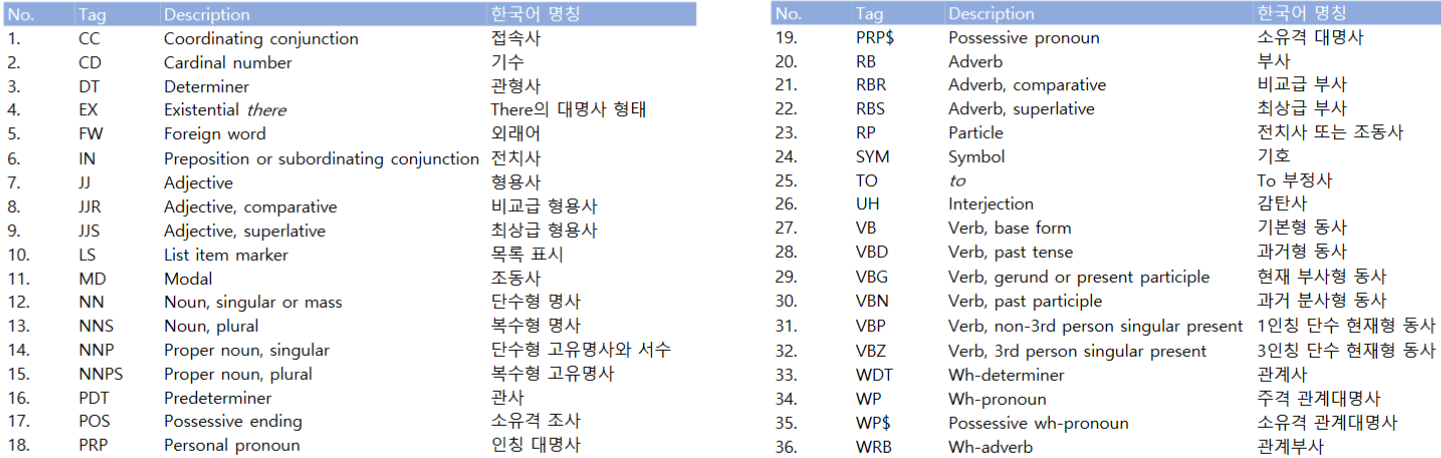

## spaCy
- python을 C언어로 변환한 Cython 언어로 작성.
- 매우 빠르며 NLTK에 비해 정확도도 높아 푀근 많이 사용됨.
- https://spacy.io/usage 

의존성 문제가 있으니 conda로 설치하자

In [14]:
!python -m spacy download en_core_web_sm # 영어 분석 사전 설치

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 3.3 MB/s eta 0:00:04
     - -------------------------------------- 0.5/12.8 MB 3.3 MB/s eta 0:00:04
     -- ------------------------------------ 0.8/12.8 MB 817.9 kB/s eta 0:00:15
     -- ------------------------------------ 0.8/12.8 MB 817.9 kB/s eta 0:00:15
     -- ------------------------------------ 0.8/12.8 MB 817.9 kB/s eta 0:00:15
     --- ----------------------------------- 1.3/12.8 MB 817.9 kB/s eta 0:00:15
     ------ --------------------------------- 2.1/12.8 MB 1.2 MB/s eta 0:00:09
     -------- ------------------------------- 2.6/12.8 MB 1.4 MB/s eta 0:00:08
     ---------- ----------------------------- 3.4/12.8 MB 1.6 MB/s eta 0:00:06
     ------------- -------------------------- 4.2/12.8 MB 1.8 MB/s eta 0:00:05
     -------------- ------------------------- 4.7/12.8 MB 1.9 

In [15]:
import spacy
nlp = spacy.load('en_core_web_sm')  # 영어 사전으로 모델 설정

In [16]:
sentence = "This film is visually stunning and emotionally captivating. The complex characters and unpredictable plot twists immerse the audience completely into the world of the movie."

In [17]:
doc = nlp(sentence)

In [20]:
for token in doc :
    print(f'[{token.pos_:5} - {token.tag_:3}] : {token.text} ({token.lemma_})')

[DET   - DT ] : This (this)
[NOUN  - NN ] : film (film)
[AUX   - VBZ] : is (be)
[ADV   - RB ] : visually (visually)
[ADJ   - JJ ] : stunning (stunning)
[CCONJ - CC ] : and (and)
[ADV   - RB ] : emotionally (emotionally)
[VERB  - VBG] : captivating (captivate)
[PUNCT - .  ] : . (.)
[DET   - DT ] : The (the)
[ADJ   - JJ ] : complex (complex)
[NOUN  - NNS] : characters (character)
[CCONJ - CC ] : and (and)
[ADJ   - JJ ] : unpredictable (unpredictable)
[NOUN  - NN ] : plot (plot)
[NOUN  - NNS] : twists (twist)
[VERB  - VB ] : immerse (immerse)
[DET   - DT ] : the (the)
[NOUN  - NN ] : audience (audience)
[ADV   - RB ] : completely (completely)
[ADP   - IN ] : into (into)
[DET   - DT ] : the (the)
[NOUN  - NN ] : world (world)
[ADP   - IN ] : of (of)
[DET   - DT ] : the (the)
[NOUN  - NN ] : movie (movie)
[PUNCT - .  ] : . (.)


- [품사 정보 - 세부 품사 정보] : 어절 (기본형)

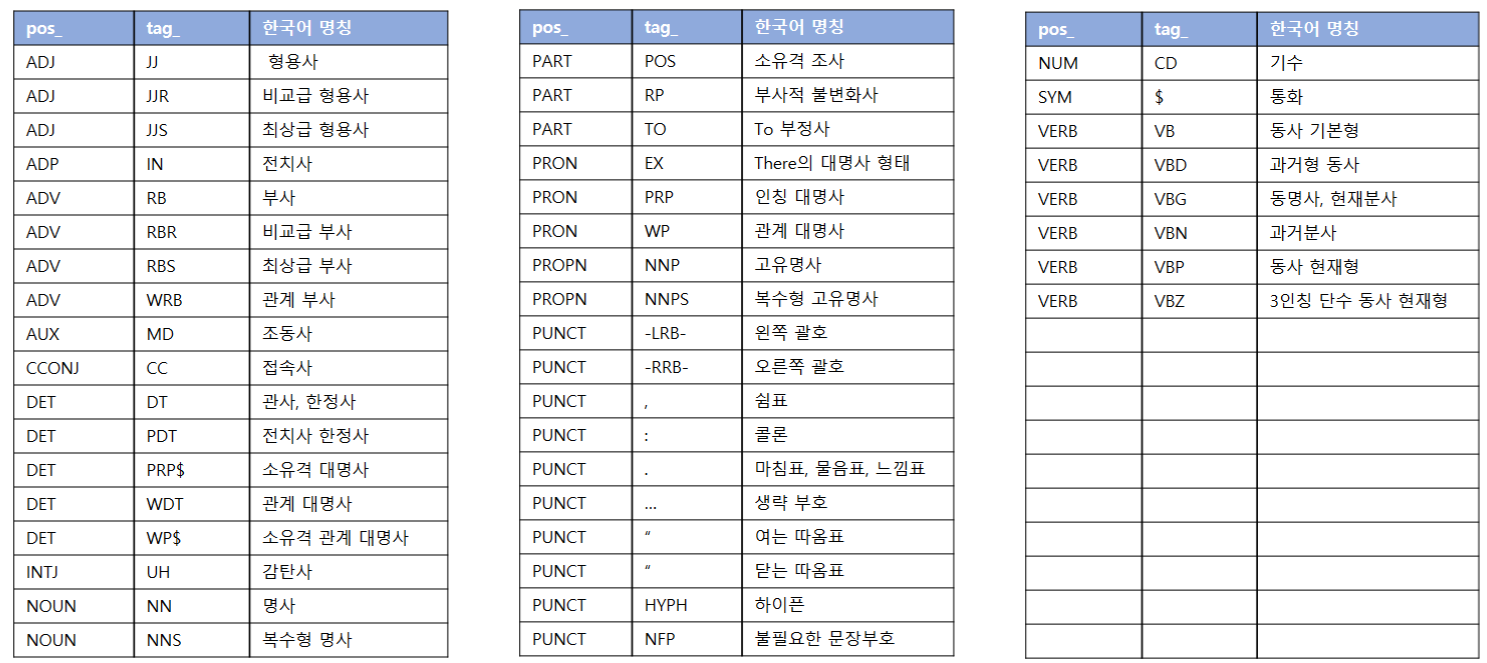

# 사전 어휘 추가
- ‘형태소분석기’라는 명칭을 생각하면 분석 내용은 항상 형태소 단위여야 한다고 생각할 수 있다 -- 그러나 문장을 ‘의미있는 단위’로 분리하는 목적이지, 반드시 ‘최소 의미 단위’로의 분리가 아니다

- 영어의 경우에는 POS tagger(Part of Speech tagger)라는 이름으로 사용되는데, 이 때의 part는 단어(word)가 될 것으로 기대한다. 그 이유는 영어에서 형태소 단위는 기대하는 단위 이하이기 때문이다. (영어는 기본적으로 띄어쓴 단위가 곧 단어)
- 하지만 한국어의 경우에는 단어 단위는 기대하는 단위 이상일 때가 많으므로 단어 이하의 단위로 분리해야 하며, 이것은 곧 형태소 단위가 된다.
	- 복합명사에서는 ‘형태소 단위’가 아닌, 의미있는 단위가 중요하므로 목적에 적합한 단위(형태소/단어)로 나누어줄 필요가 있다.
		- 탄도미사일 → 탄도미사일(O?), ‘탄도’, ‘미사일’(X?)

## 불용어 목록
- 불용어는 과제의 성격에 따라 다를 수 있다.
	- 일반적으로 불용어로 다루는 대상
	  
		- 형식형태소 – 품사 태그를 이용하여 일괄 지정할 수 있다
			- 주격조사(JKS), 보격조사(JKC), 관형격조사(JKG), 목적격조사(JKO), 부사격조사(JKB), 호격조사(JKV), 인용격조사(JKQ), 보조사(JX), 접속조사(JC), 선어말어미(EP), 종결어미(EF), 연결어미(EC), 명사형전성어미(ETN), 관형형전성어미(ETM), 체언접두사(XPN), 명사파생 접미사(XSA), 마침표, 물음표, 느낌표(SF), 따옴표, 괄호표, 줄표(SS), 쉼표, 가운뎃점, 콜론, 빗금(SP), 줄임표(SE), 붙임표(물결, 숨김, 빠짐) SO, 기타기호(논리수학기호, 화폐기호) SW, 분석불능범주(NA)
		
		- 기호류 – 기호류 태그로 지정 가능하나, 직접 일부분을 선택하기도 한다.
			- `".", "?", "!", "。", "‘", "’", "“", "”", " \` ", "\'", "\"", "(", ")", "{", "}", "[", "]", "─", "『", "』", ",", "ㆍ", "·", "ᆞ", ":", ";", "/", "…", "_", "~", "∼", "∽", "□", "■", " ", " ", "◆", "▲", "◇", "◈", " ", "【", "】", "+", "-", "=", "±", "÷", "×", "*", "^", ">", "<", "｜", "|", "％", "%", "&", "￦", "₩", "\\", "\t", "\r\n", "\n", "＄", "$", "¥", "￥", "£", "￡", "°", "㎞","㎏", "@", "©", "ⓒ", "↑", "|", "#", " ", "♡", "★", "☆", "♪", "♬"`
		
		- 실질형태소 중 불용어
			- 품사태그: 수사(NR), 숫자(SN), 의존명사(NNB), 보조용언(VX), 긍정지정사(VCP), 부정지정사(VCN), 명사추정범주(NF), 용언추정범주(NV)
			- 형태: "하다", "있다", "되다", "그", "않다", "없다", "나", "말", "사람", "이", "보다", "한","때", "년", "같다", "대하다", "일", "이", "생각", "위하다", "때문", "그것", "그러나", "가다", "받다", "그렇다", "알다", "사회", "더", "그녀", "문제", "오다", "그리고", "크다", "속"
				- 국립국어원 말뭉치 실질형태소 고빈도 어휘 50위 중, 'NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ＇에 해당하는 것
		
		- 영어 불용어 – 구글에서 제시한 목록
			- "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can't", "cannot", "could", "couldn't", "did", "didn't", "do", "does","doesn't", "doing", "don't", "down", "during", "each", "few", "for", "from", "further","had", "hadn't", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll","he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", "let's", "me", "more", "most", "mustn't", "my", "myself", "no", "nor", "not", "of", "off", "on", "once", "only", "or", "other", "ought", "our", "ours ourselves", "out", "over", "own", "same", "shan't", "she", "she'd", "she'll", "she's", "should", "shouldn't", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "won't", "would", "wouldn't", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves


## 사전 추가 방법
- Python Library가 설치된 경로를 찾는다
- Lib\site-packages 폴더에서 rhinoMorph 폴더를 찾는다
	- 예) Anaconda를 이용하여 C:\에 설치한 경우
		- `C:\Anaconda3\Lib\site-packages`

-  resource 폴더로 진입하면 6개의 텍스트 파일을 확인할 수 있다
-  stem_MethodDeleted.txt 파일을 연다

- 파일의 최하단에 형식에 맞춰 새로운 단어를 입력한다
- `해당어휘\t해당어휘/품사태그`
	-  마지막에는 엔터를 쳐서 빈 줄이 하나 들어가게 한다
		- (반드시 한 번만 엔터가 들어가게 한다)

![Pasted image 20240903161013.png](<attachment:Pasted image 20240903161013.png>)

![Pasted image 20240903161101.png](<attachment:Pasted image 20240903161101.png>)
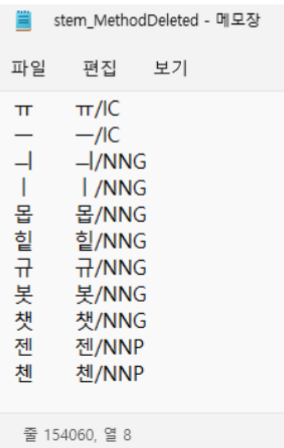
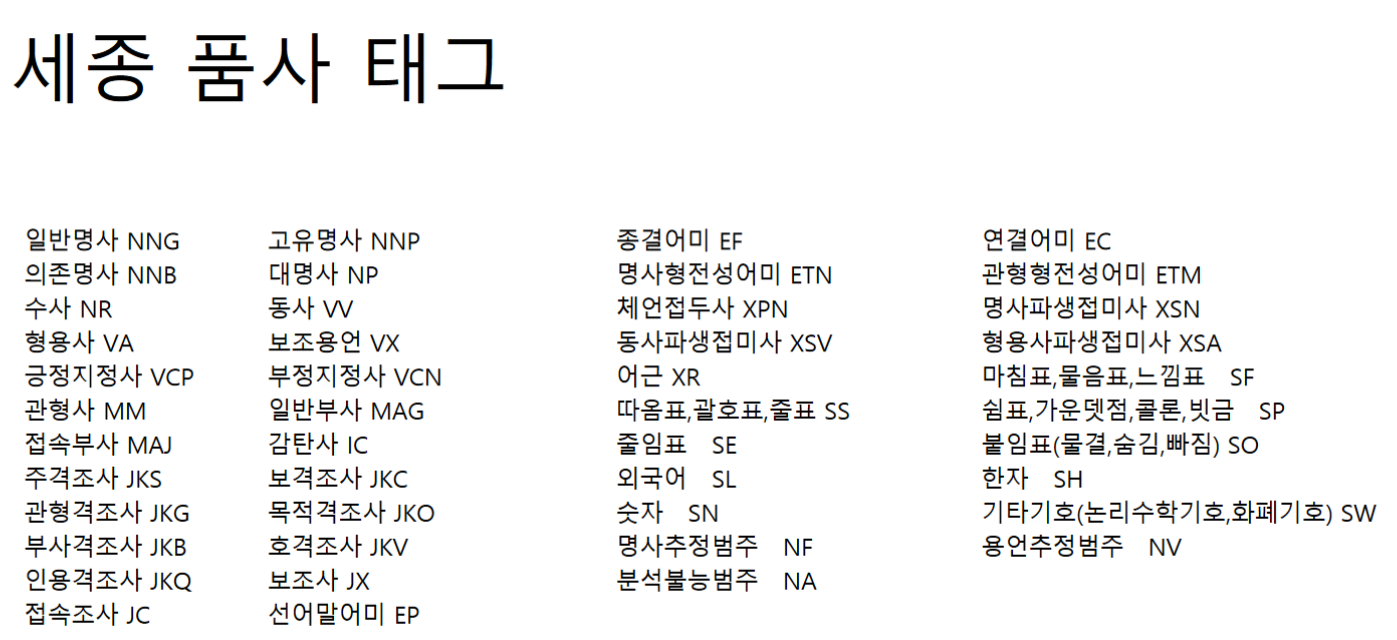